# Find Species-Level Images of Tree Genera from AutoArborist by Reconciling Locations of City Tree Inventories

In [39]:
# Libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
import os
import matplotlib.pyplot as plt
from PIL import Image

# Read in Species-Rectified AutoArborist Dataset

From Github: https://github.com/ncsu-landscape-dynamics/gsv_host_detector/tree/main/tree_inventory


In [40]:
# The AutoArborist dataset contains genus-level images and locations. 
# This data was merged to city tree inventories with species-level location data by latitude/ longitude
aa_data = pd.read_csv(r"G:/Shared drives/host_tree_cnn/merging_autoarborist_w_inventories/autoarborist_names_appended/AutoArboristData.csv", low_memory=False)
aa_data.head()

,Index,IDX,SHAPE_LNG,SHAPE_LAT,GENUS,TAXONOMY_ID,location,type,Tree ID,Tree Location IDX,...,rounded_lng,Genus,Genus Label,Capture Time Street Img,Tree Center X Street Img,Tree Center Y Street Img,original_lat,original_lng,genus_name,species_name
0,0,077b8586-1f14-11ec-81f2-eb8801c6f8d0,-86.532817,39.159436,cornus,83,Bloomington,train,8565243926414771871,077b8586-1f14-11ec-81f2-eb8801c6f8d0,...,-86.5328,cornus,83,May 2019,257,576,39.159436,-86.532817,cornus,florida
1,1,077b8694-1f14-11ec-81f2-eb8801c6f8d0,-86.532962,39.159282,cornus,83,Bloomington,train,895590795344673619,077b8694-1f14-11ec-81f2-eb8801c6f8d0,...,-86.5329,cornus,83,May 2019,387,576,39.159282,-86.532962,cornus,florida
2,2,077b877a-1f14-11ec-81f2-eb8801c6f8d0,-86.531563,39.159272,cornus,83,Bloomington,train,8300956921542110556,077b877a-1f14-11ec-81f2-eb8801c6f8d0,...,-86.5315,cornus,83,May 2019,313,576,39.159272,-86.531563,cornus,florida
3,3,077b8842-1f14-11ec-81f2-eb8801c6f8d0,-86.531343,39.159279,juniperus,156,Bloomington,train,2921012368023539546,077b8842-1f14-11ec-81f2-eb8801c6f8d0,...,-86.5313,juniperus,156,May 2019,521,576,39.159279,-86.531343,juniperus,virginiana
4,4,077b8900-1f14-11ec-81f2-eb8801c6f8d0,-86.530603,39.159408,quercus,247,Bloomington,train,11472771202647275742,077b8900-1f14-11ec-81f2-eb8801c6f8d0,...,-86.5306,quercus,247,May 2019,253,576,39.159408,-86.530603,quercus,rubra


# Summarize Data by Genus

# What proportion of AutoArborist Records Match Tree Inventories?

In [41]:

# For each genus in the 'GENUS' column from AutoArborist,
# How often does the 'GENUS' match the 'genus_name' column from the tree inventories?

# Match 'GENUS' and 'genus_name' columns by string
aa_data['match'] = aa_data['GENUS'].str.lower() == aa_data['genus_name'].str.lower()


# Calculate the proportion of matches per genus
# How often does the 'GENUS' match the 'genus_name' column from the tree inventories?
match_summary = aa_data.groupby('GENUS').agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)

# Calculate proportion of matching columns and filter
match_summary['match_proportion'] = match_summary['match_count'] / match_summary['total_records']
match_summary = match_summary[match_summary['total_records'] >= 500]

# Display the summary
match_summary.reset_index(inplace=True)
match_summary


,GENUS,total_records,match_count,match_proportion
0,abies,1544,540,0.349741
1,acacia,13752,8368,0.608493
2,acer,128733,92839,0.721175
3,aesculus,12835,7502,0.584496
4,afrocarpus,3326,2845,0.855382
5,agonis,1678,1197,0.713349
6,ailanthus,6893,4795,0.695633
7,albizia,2291,1662,0.725447
8,alnus,3653,2182,0.597317
9,amelanchier,19895,8449,0.424680


# Summarize Data by Genus and City

# What proportion of AutoArborist Records Match Tree Inventories?

In [52]:
# Summarize Data - Proportion of Matches between Autoarborist and Tree Inventories for Genera and Cities

match_summary_city_genus = aa_data.groupby(['City', 'GENUS']).agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)
match_summary_city_genus['match_proportion'] = match_summary_city_genus['match_count'] / match_summary_city_genus['total_records']

# Filter out rows with less than 500 total_records
match_summary_city_genus = match_summary_city_genus[match_summary_city_genus['total_records'] >= 500]

# Sort by match_proportion in descending order
match_summary_city_genus = match_summary_city_genus.sort_values(by='match_proportion', ascending=False).reset_index()

print(match_summary_city_genus[match_summary_city_genus['GENUS'] == 'acer'])

             City GENUS  total_records  match_count  match_proportion
17         Surrey  acer           5513         5258          0.953746
45     Pittsburgh  acer           5405         5042          0.932840
82     SiouxFalls  acer           7742         7072          0.913459
102       Buffalo  acer          10048         9080          0.903662
131    LosAngeles  acer          12947        11403          0.880745
163       Seattle  acer          10080         8650          0.858135
178     Cambridge  acer           6801         5780          0.849875
181        Denver  acer           5077         4281          0.843214
200       NewYork  acer           5116         4234          0.827600
226       Boulder  acer           5837         4733          0.810862
270  WashingtonDc  acer           7649         5990          0.783109
328      Edmonton  acer           3523         2617          0.742833
364       SanJose  acer           4209         3035          0.721074
397     Kitchener  a

In [53]:
# Summarize Data - Proportion of Matches between Autoarborist and Tree Inventories for Genera and Cities

match_summary_city_genus = aa_data.groupby(['City', 'GENUS']).agg(
    total_records=('match', 'size'),
    match_count=('match', 'sum')
)
match_summary_city_genus['match_proportion'] = match_summary_city_genus['match_count'] / match_summary_city_genus['total_records']

# Filter out rows with less than 500 total_records
match_summary_city_genus = match_summary_city_genus[match_summary_city_genus['total_records'] >= 500]

# Sort by match_proportion in descending order
match_summary_city_genus = match_summary_city_genus.sort_values(by='match_proportion', ascending=False).reset_index()

print(match_summary_city_genus[match_summary_city_genus['GENUS'] == 'juglans'])

           City    GENUS  total_records  match_count  match_proportion
171  LosAngeles  juglans           2455         2096          0.853768
383   Cambridge  juglans           1189          830          0.698066
415     SanJose  juglans           1710         1142          0.667836
603    Columbus  juglans            599            0          0.000000


# Filter images of Acer by Species

In [44]:

# Filter AutoArborist by 'GENUS' column reported in AutoArborist
acer_data = aa_data[aa_data['GENUS'].str.lower() == 'acer']

# Filter Tree Inventory data by 'genus_name' column reported in tree inventories
acer_data = acer_data[acer_data['genus_name'].str.lower() == 'acer']

# Filter Tree Inventory data by 'species_name' column reported in tree inventories
red_maple_data = acer_data[acer_data['species_name'].str.lower() == 'rubrum']
print(f"There are ", len(red_maple_data), "records for red maple")

sugar_maple_data = acer_data[acer_data['species_name'].str.lower() == 'saccharum']
print(f"There are ", len(sugar_maple_data), "records for sugar maple")

silver_maple_data = acer_data[acer_data['species_name'].str.lower() == 'saccharinum']
print(f"There are ", len(silver_maple_data), "records for silver maple")

norway_maple_data = acer_data[acer_data['species_name'].str.lower() == 'platanoides']
print(f"There are ", len(norway_maple_data), "records for norway maple")


There are  16368 records for red maple
There are  5937 records for sugar maple
There are  11677 records for silver maple
There are  29552 records for norway maple


# Filter Images of Juglans by Species

In [45]:

# Filter AutoArborist by 'GENUS column reported in AutoArborist
juglans_data = aa_data[aa_data['GENUS'].str.lower() == 'juglans']

# Filter Tree Inventory data by 'genus_name' column reported in tree inventories
juglans_data = juglans_data[juglans_data['genus_name'].str.lower() == 'juglans']

black_walnut_data = juglans_data[juglans_data['species_name'].str.lower() == 'nigra']
print(f"There are ", len(black_walnut_data), "records for black walnut")


There are  1840 records for black walnut


# Images of Species from AutoArborist
# Acer Rubrum (Red Maple)

Image not found for IDX: 4e73c4ae-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4ebed4da-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4edea5e4-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f8a56fa-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50484250-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50540810-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 505596c6-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 5061f8e4-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ad7fa8-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50b1e926-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50b208ca-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ba48d2-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50bad932-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50bafcdc-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50bc337c-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50d067a2-0d34-11ec-bf73-91445146ff05
Image no

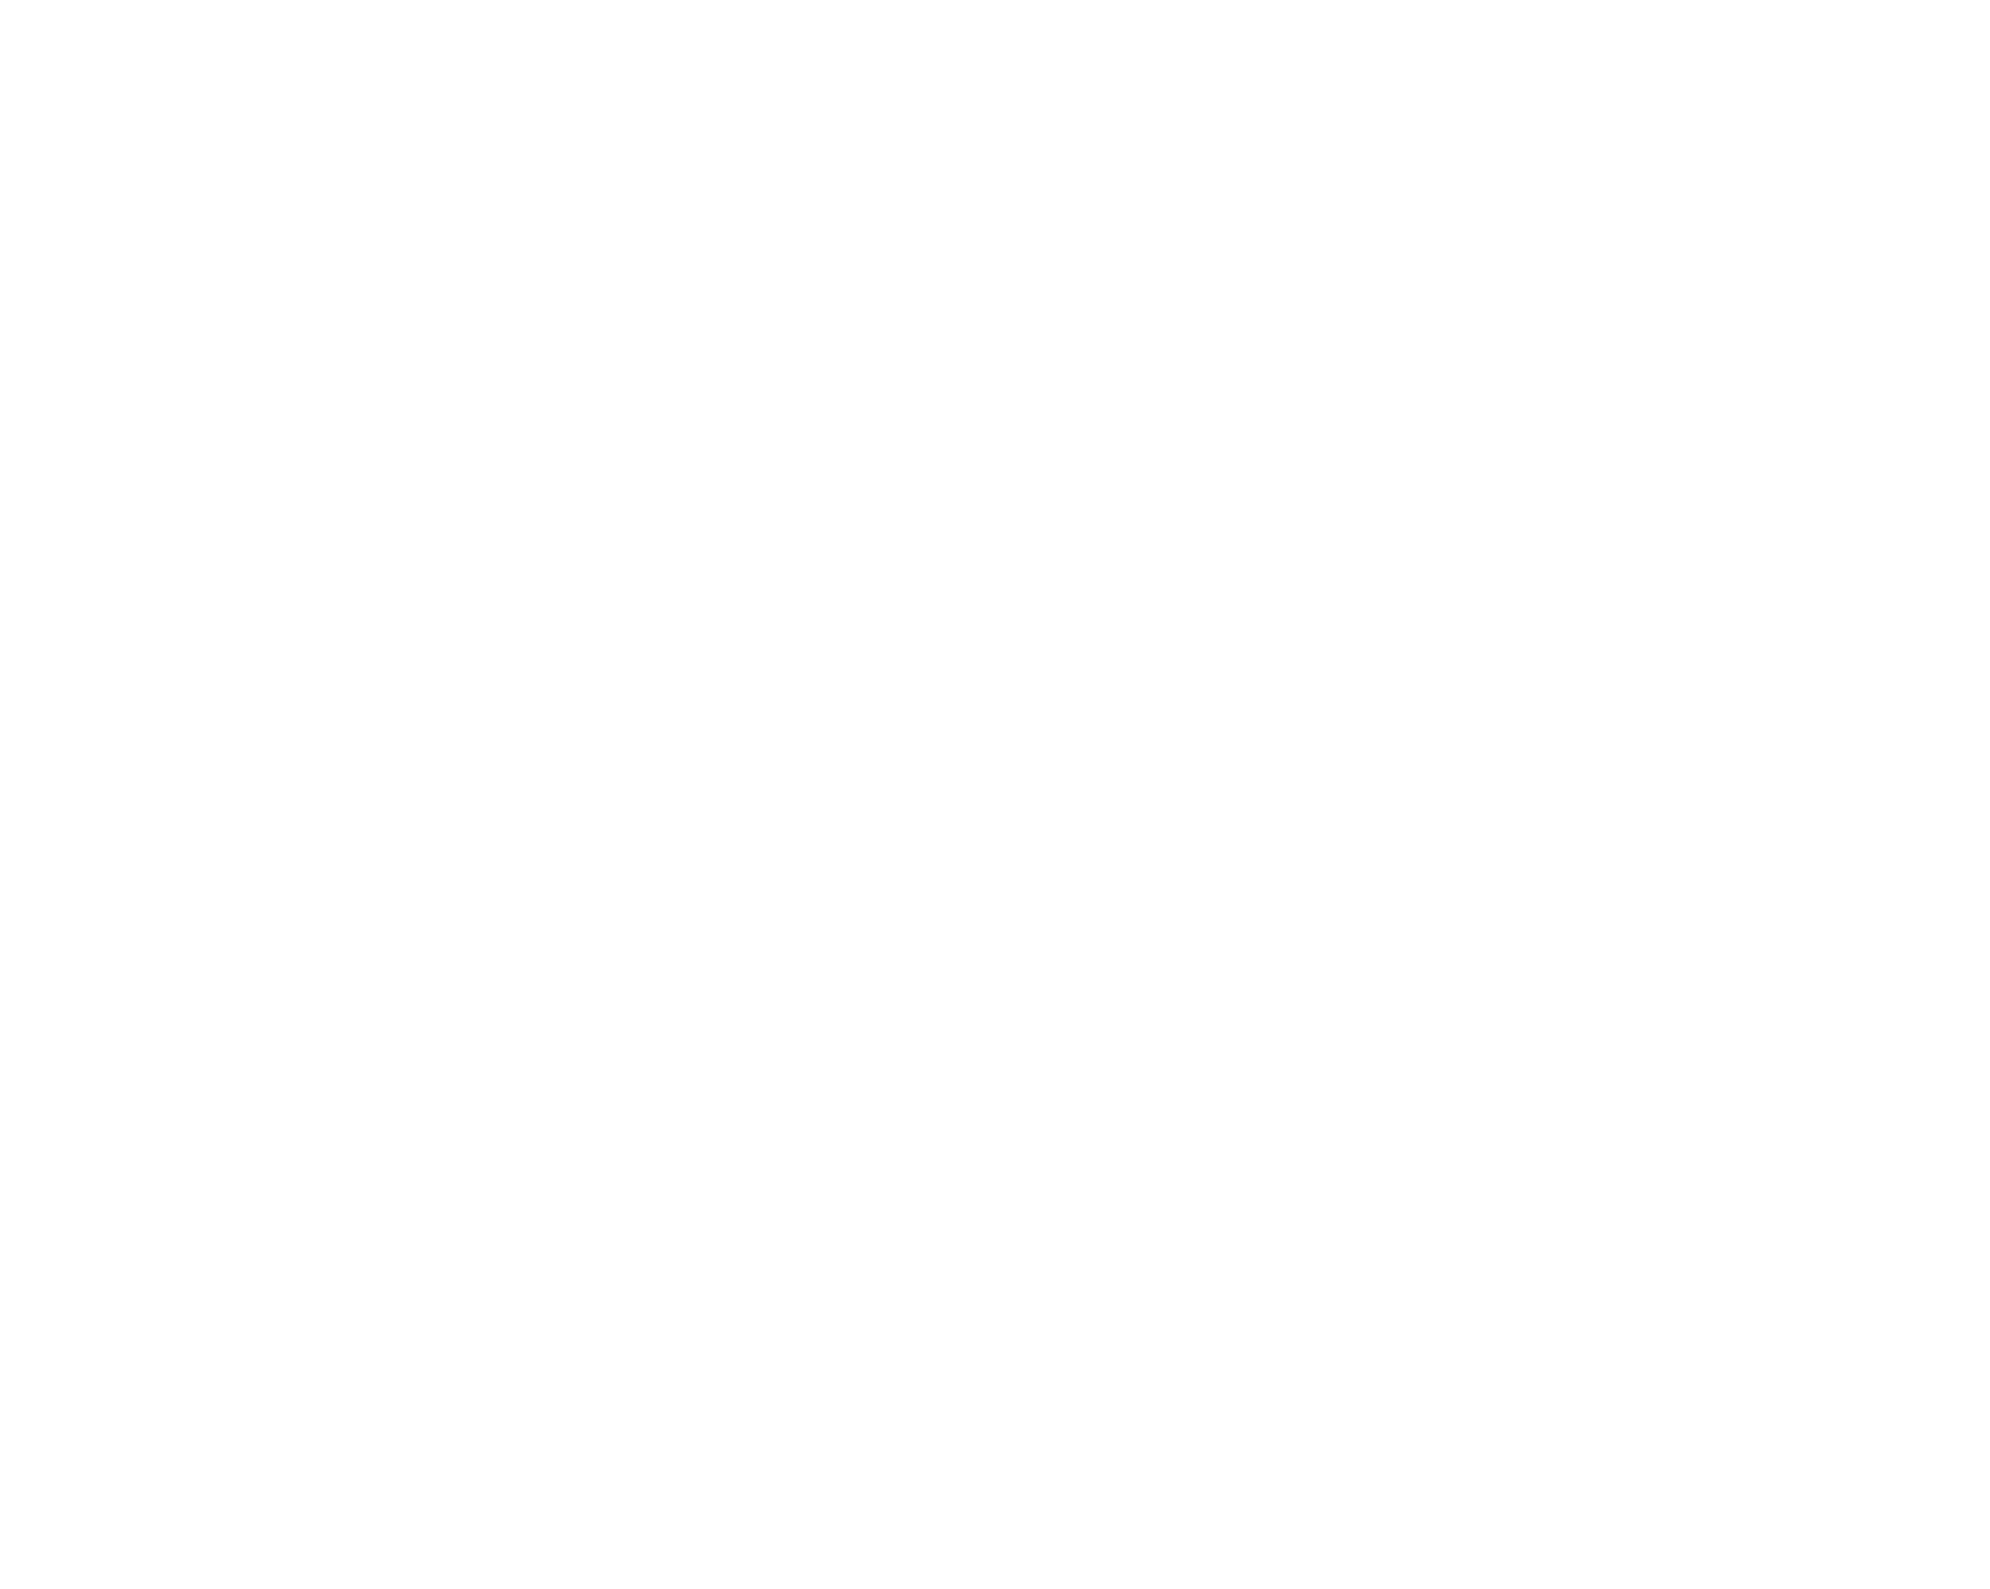

In [46]:

# Define the base directory for images
base_image_dir = r"C:/Users/talake2/Desktop/auto_arborist_cvpr2022_v015/jpegs_streetlevel_genus_idx_label"

# Function to display 20 images in a 4x5 grid
def display_species_images_grid(data, num_images=20):
    # Limit the data to the number of images to display
    data = data.head(num_images)
    
    # Set up a 4x5 grid
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration
    
    for i, (_, row) in enumerate(data.iterrows()):
        # Construct the file path based on the 'type', 'GENUS', and 'IDX' columns
        image_path = os.path.join(base_image_dir, row['type'], row['GENUS'].lower(), 'images', f"{row['IDX']}.jpeg")
        
        # Check if the image file exists
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes for cleaner display
            axes[i].set_title(f"{row['genus_name']} - {row['species_name']}")
        else:
            print(f"Image not found for IDX: {row['IDX']}")
            axes[i].axis('off')  # Hide axes if no image is found
    
    # Turn off any extra unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

display_species_images_grid(red_maple_data)


# Images of Species from AutoArborist
# Acer Saccharum (Sugar Maple)

Image not found for IDX: 4e6c995e-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4e6ca444-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4e715962-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4ec95f22-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4ec96896-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4eccbfbe-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f6c1b18-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f6c22fc-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f6c2acc-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f6dd8fe-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f7479de-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f74814a-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f749090-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 4f76a52e-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50458c86-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50465ce2-0d34-11ec-bf73-91445146ff05
Image no

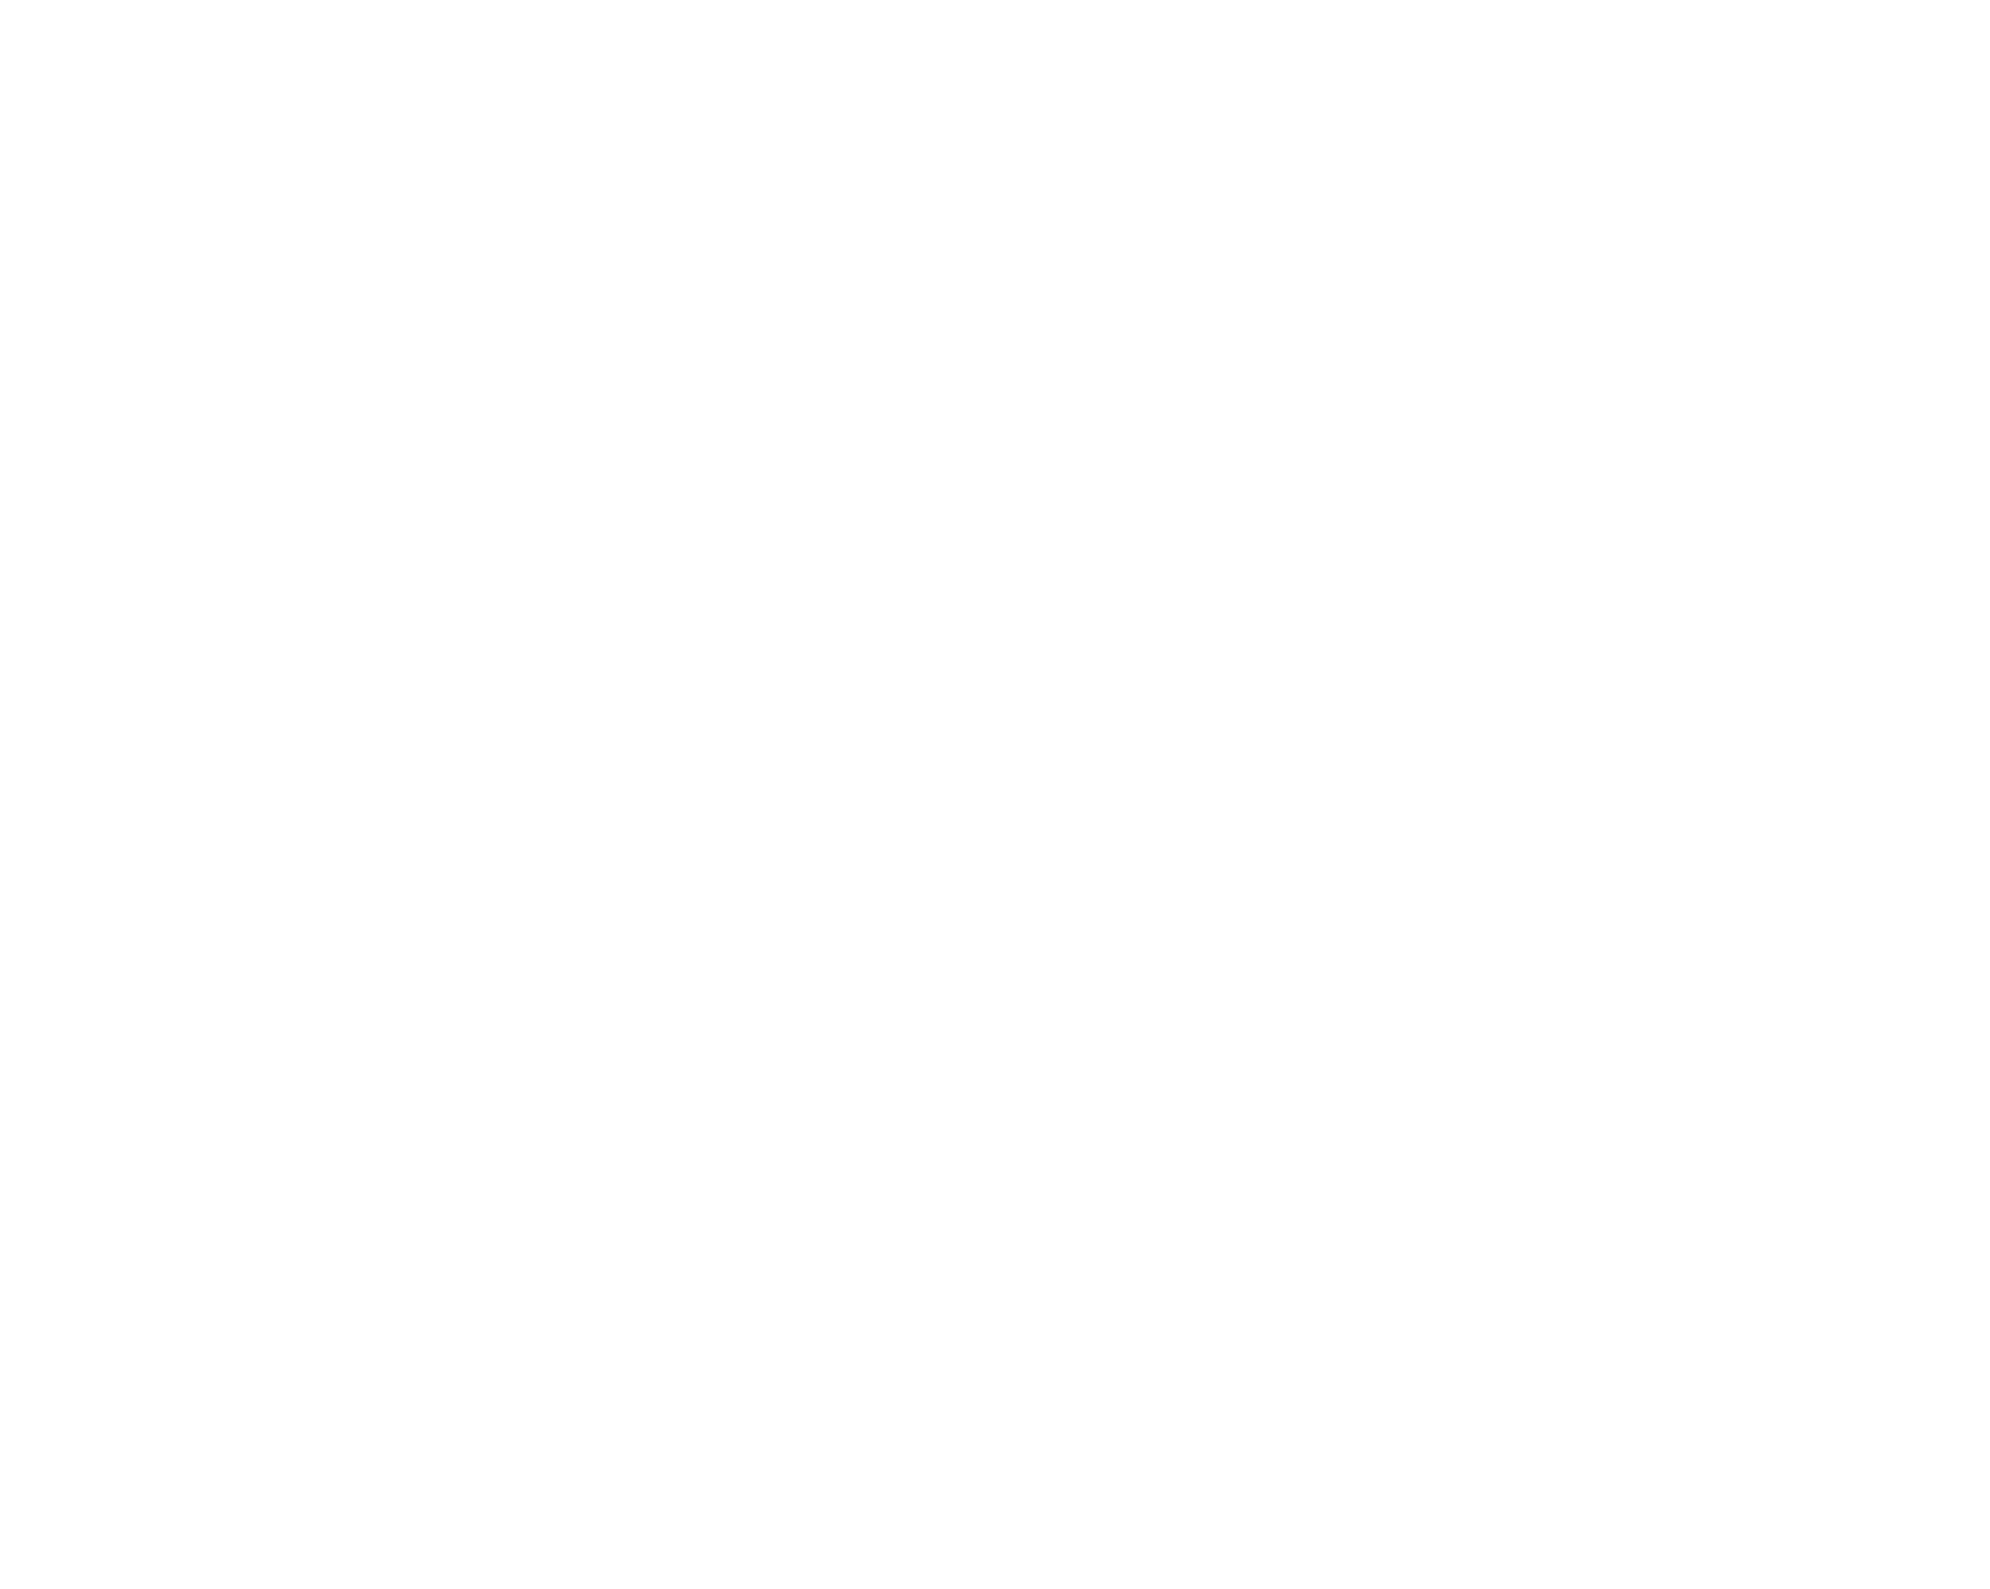

In [47]:
display_species_images_grid(sugar_maple_data)

# Images of Species from AutoArborist
# Acer Saccharinum (Silver Maple)

Image not found for IDX: 077b8a68-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8a68-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8b1c-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8b1c-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b8ef0-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b91f2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b936e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077b94ea-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077bb3ee-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077d5398-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec8b8-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec8b8-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec926-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077ec926-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077eca3e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077f248e-1f14-11ec-81f2-eb8801c6f8d0
Image no

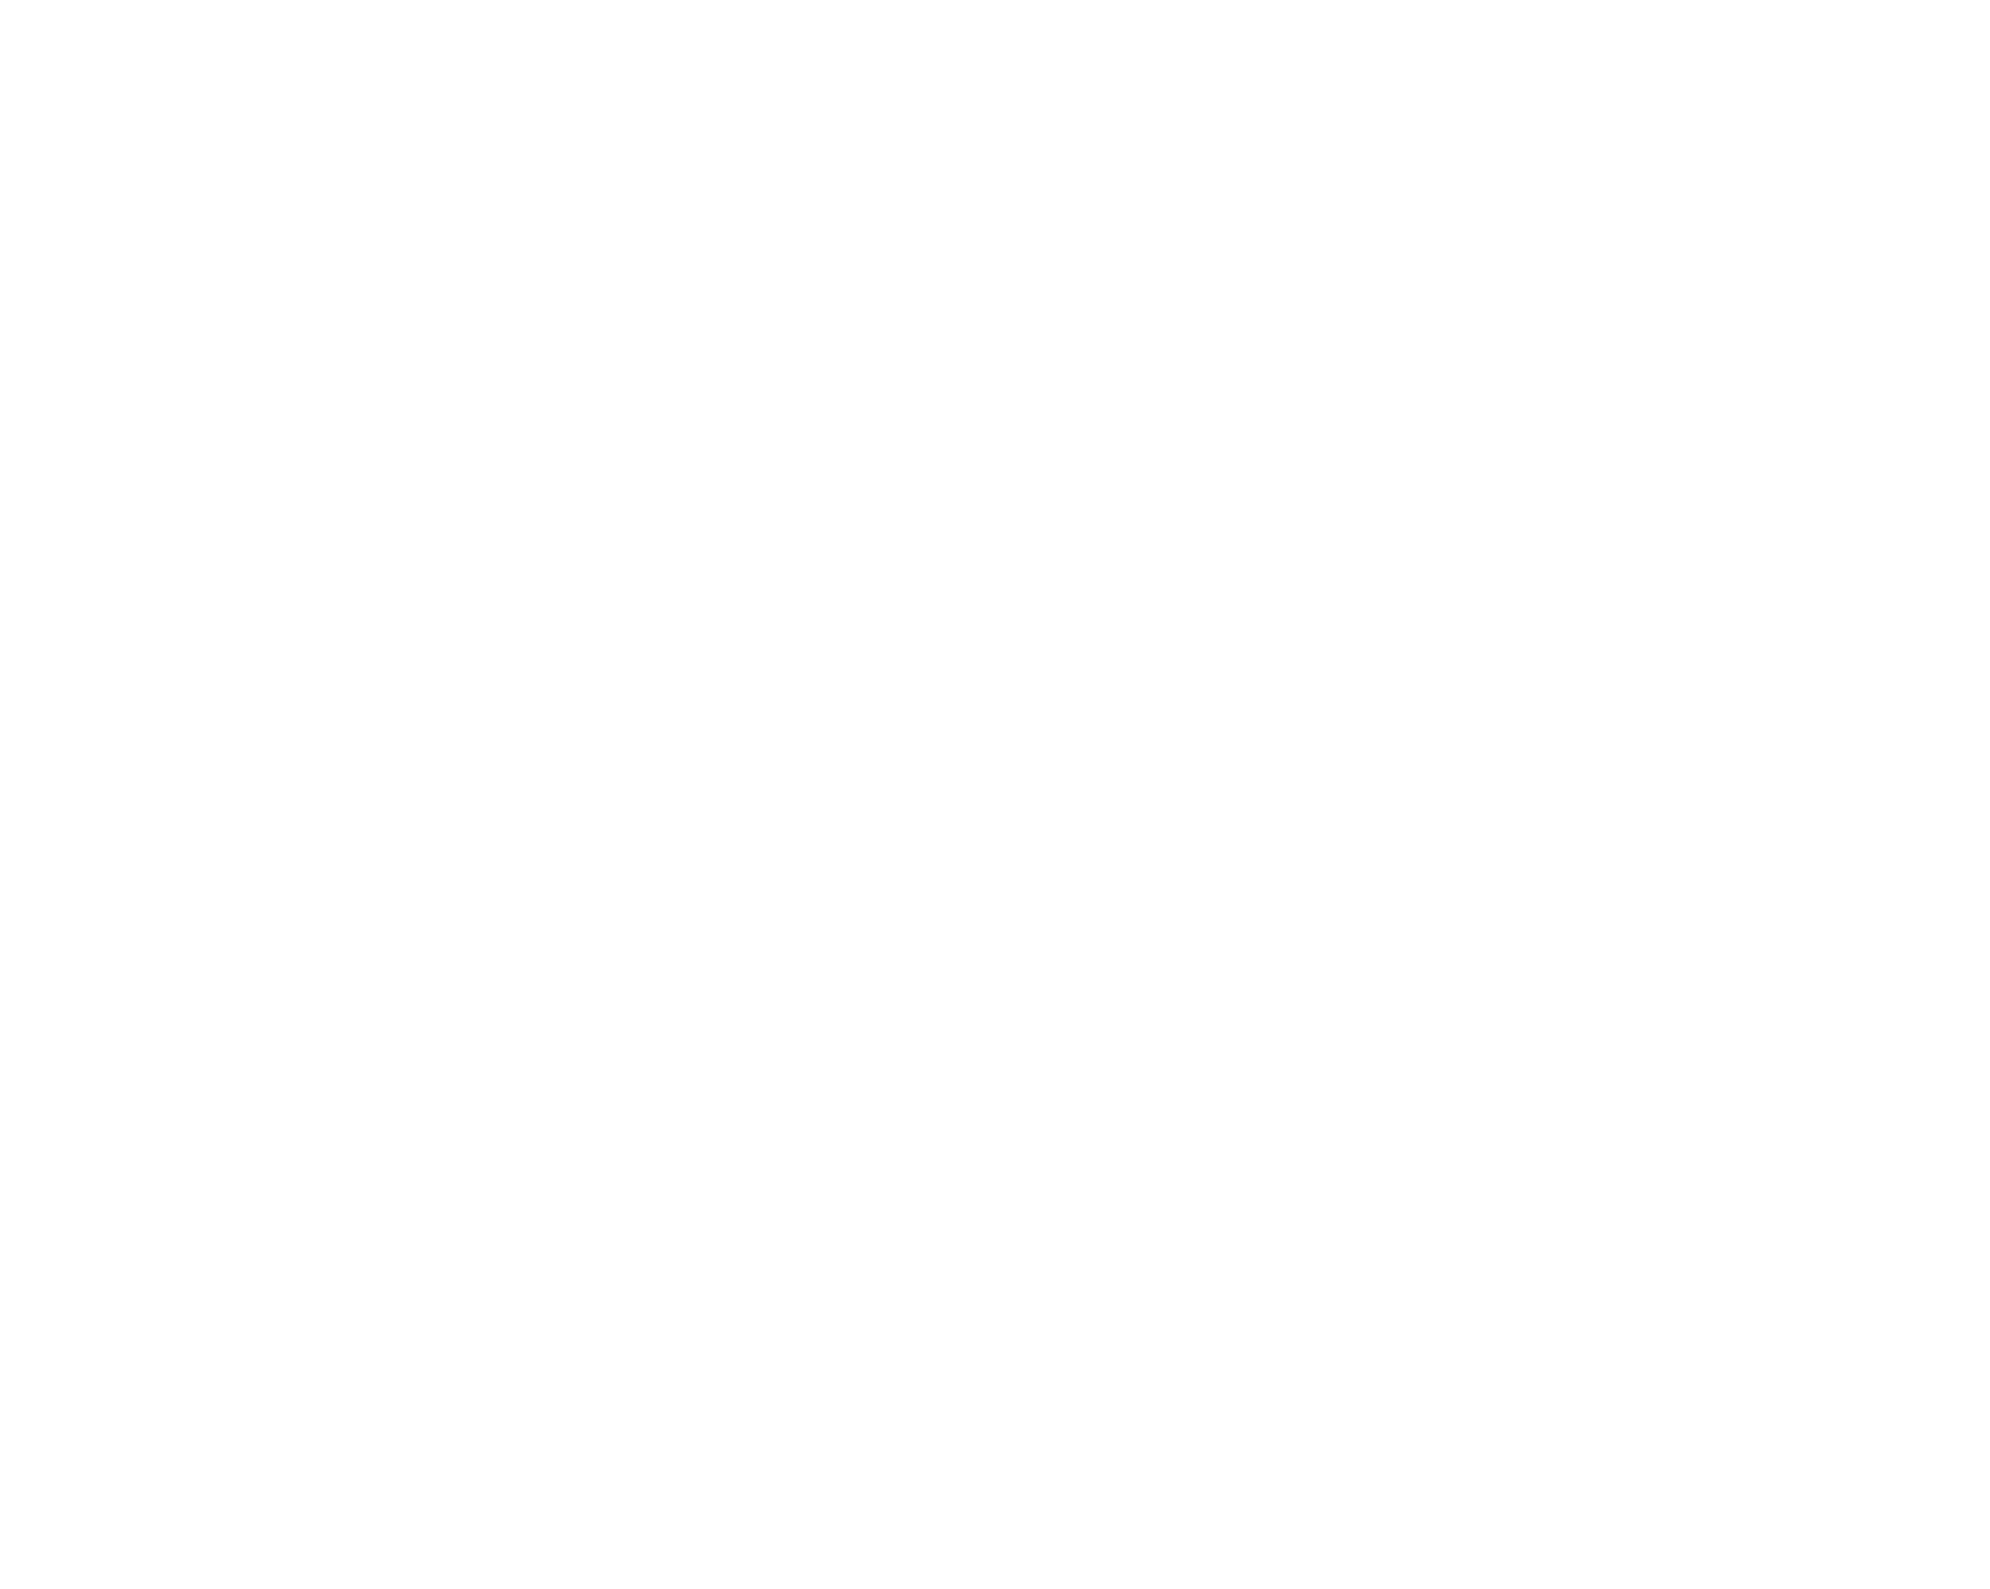

In [48]:
display_species_images_grid(silver_maple_data)

# Images of Species from AutoArborist
# Acer Platanoides (Norway Maple)

Image not found for IDX: 077c8ea4-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 077c8f44-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0781acae-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07820e10-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078213ec-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0782145a-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078215ae-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07821874-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 078218ec-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0784e662-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07903030-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 07903030-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0790309e-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0790310c-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 079031f2-1f14-11ec-81f2-eb8801c6f8d0
Image not found for IDX: 0794b984-1f14-11ec-81f2-eb8801c6f8d0
Image no

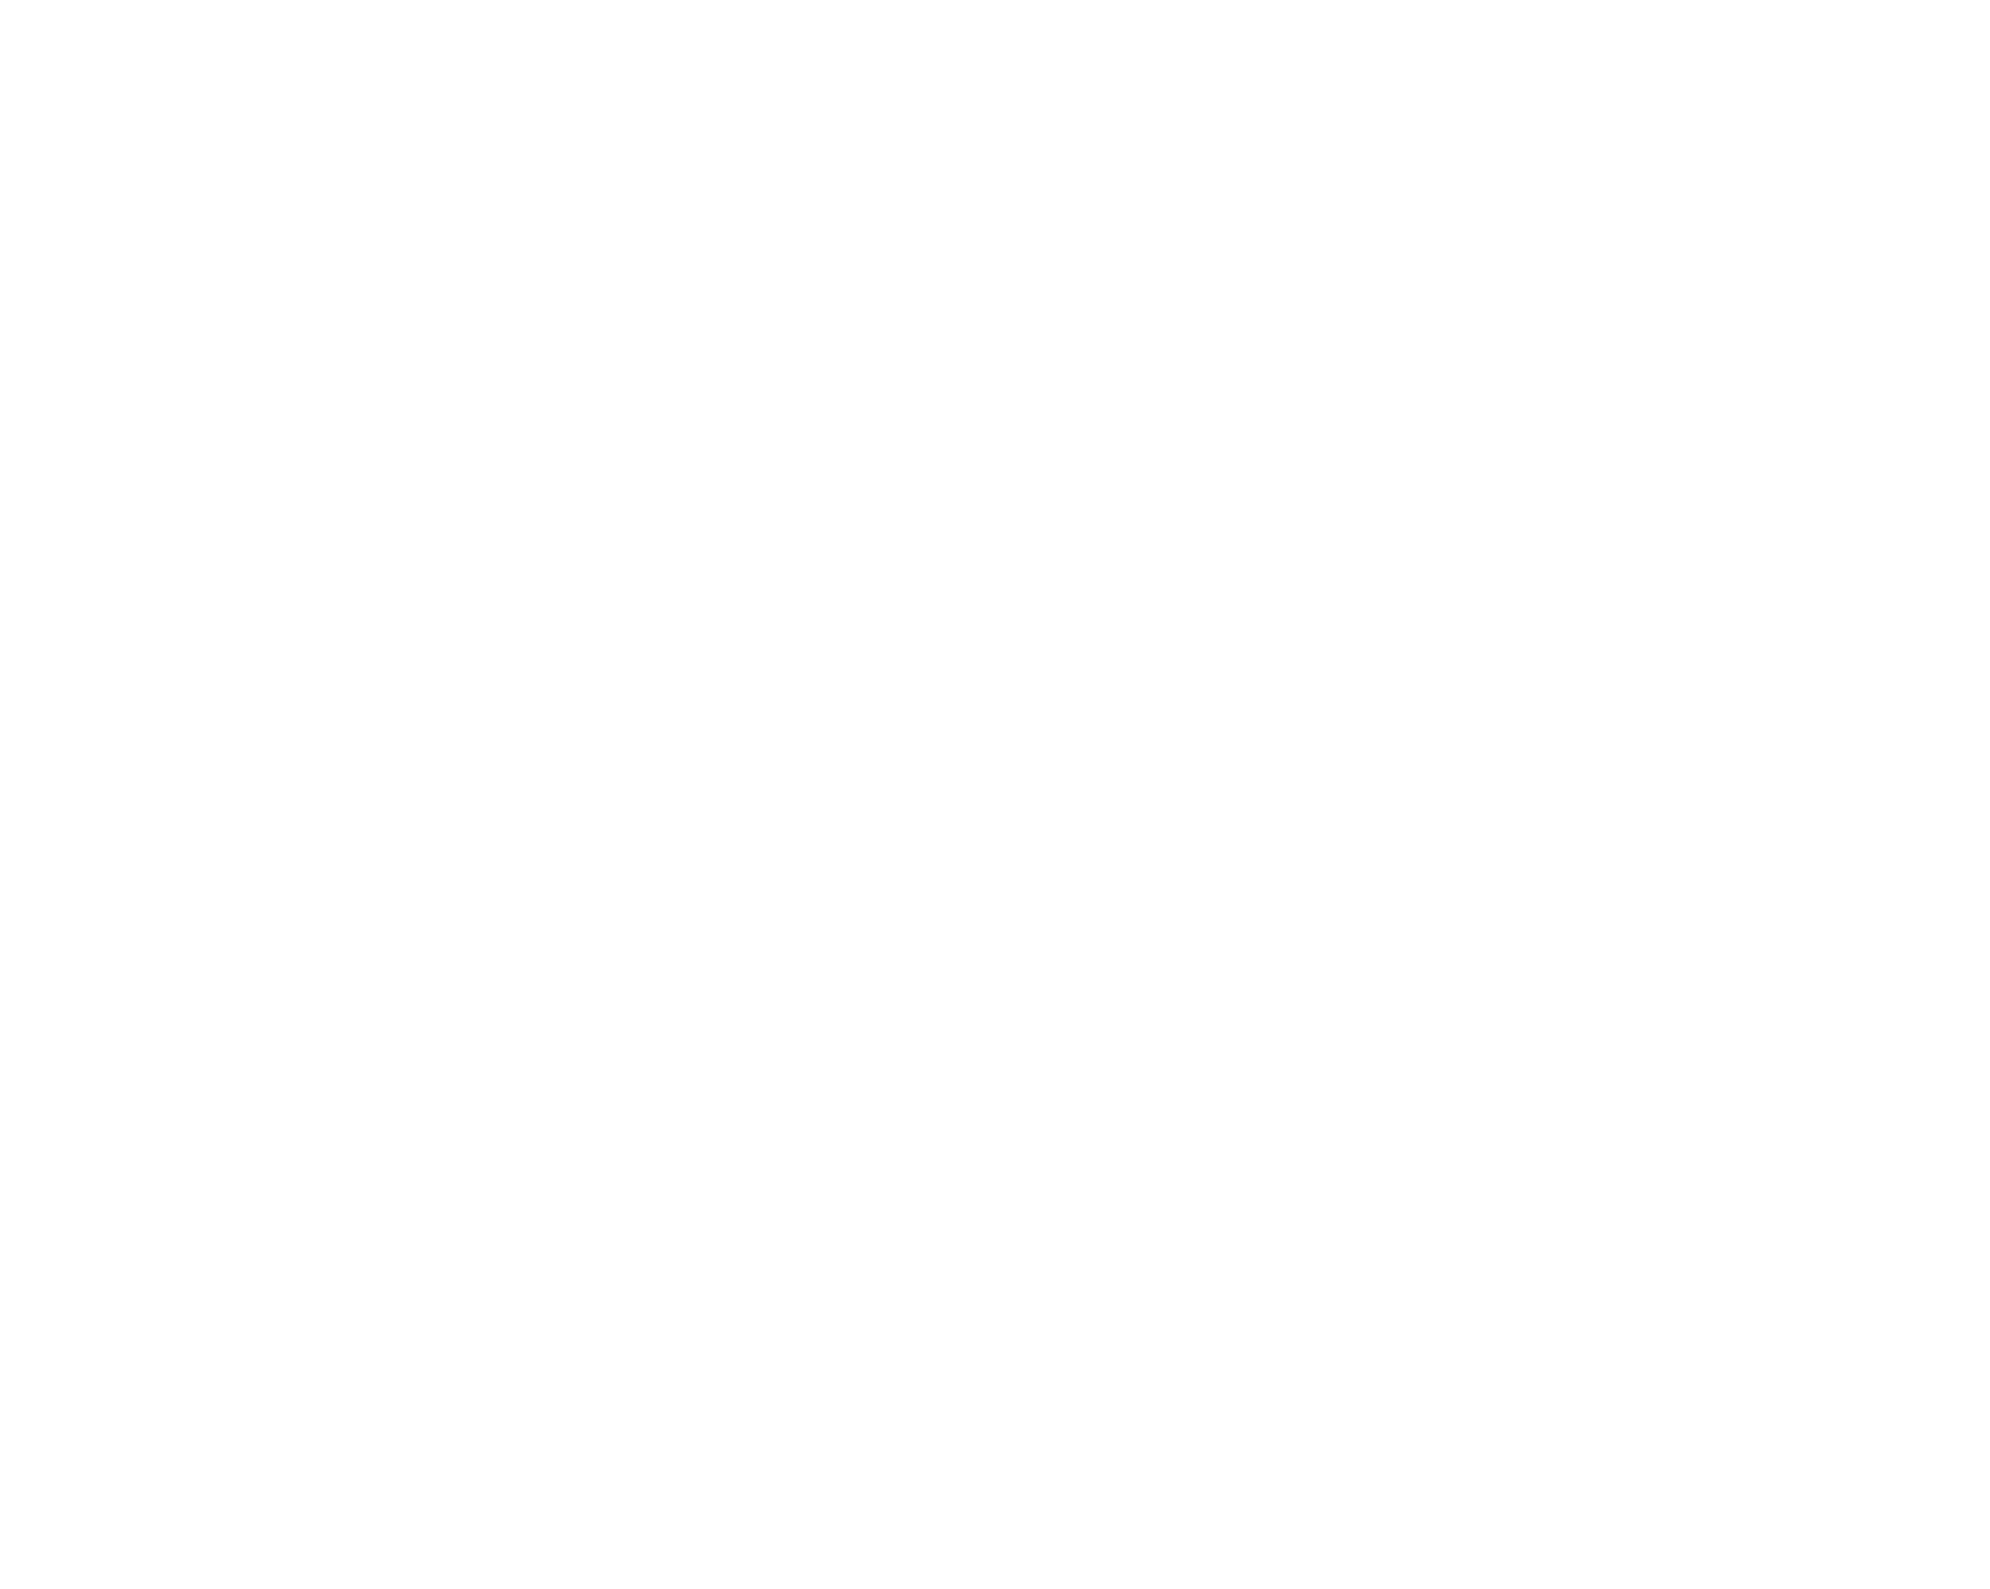

In [49]:
display_species_images_grid(norway_maple_data)

# Images of Species from AutoArborist
# Juglans Nigra (Black Walnut)

Image not found for IDX: 4ec0bd7c-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50494dda-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 5053c45e-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ad7a30-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50b2e222-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ba215e-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50bacdc0-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50bb78c4-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50c447c4-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50caaaa6-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50d2585a-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50dd0e8a-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50e50766-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ea8d30-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ea9a50-0d34-11ec-bf73-91445146ff05
Image not found for IDX: 50ecbbe6-0d34-11ec-bf73-91445146ff05
Image no

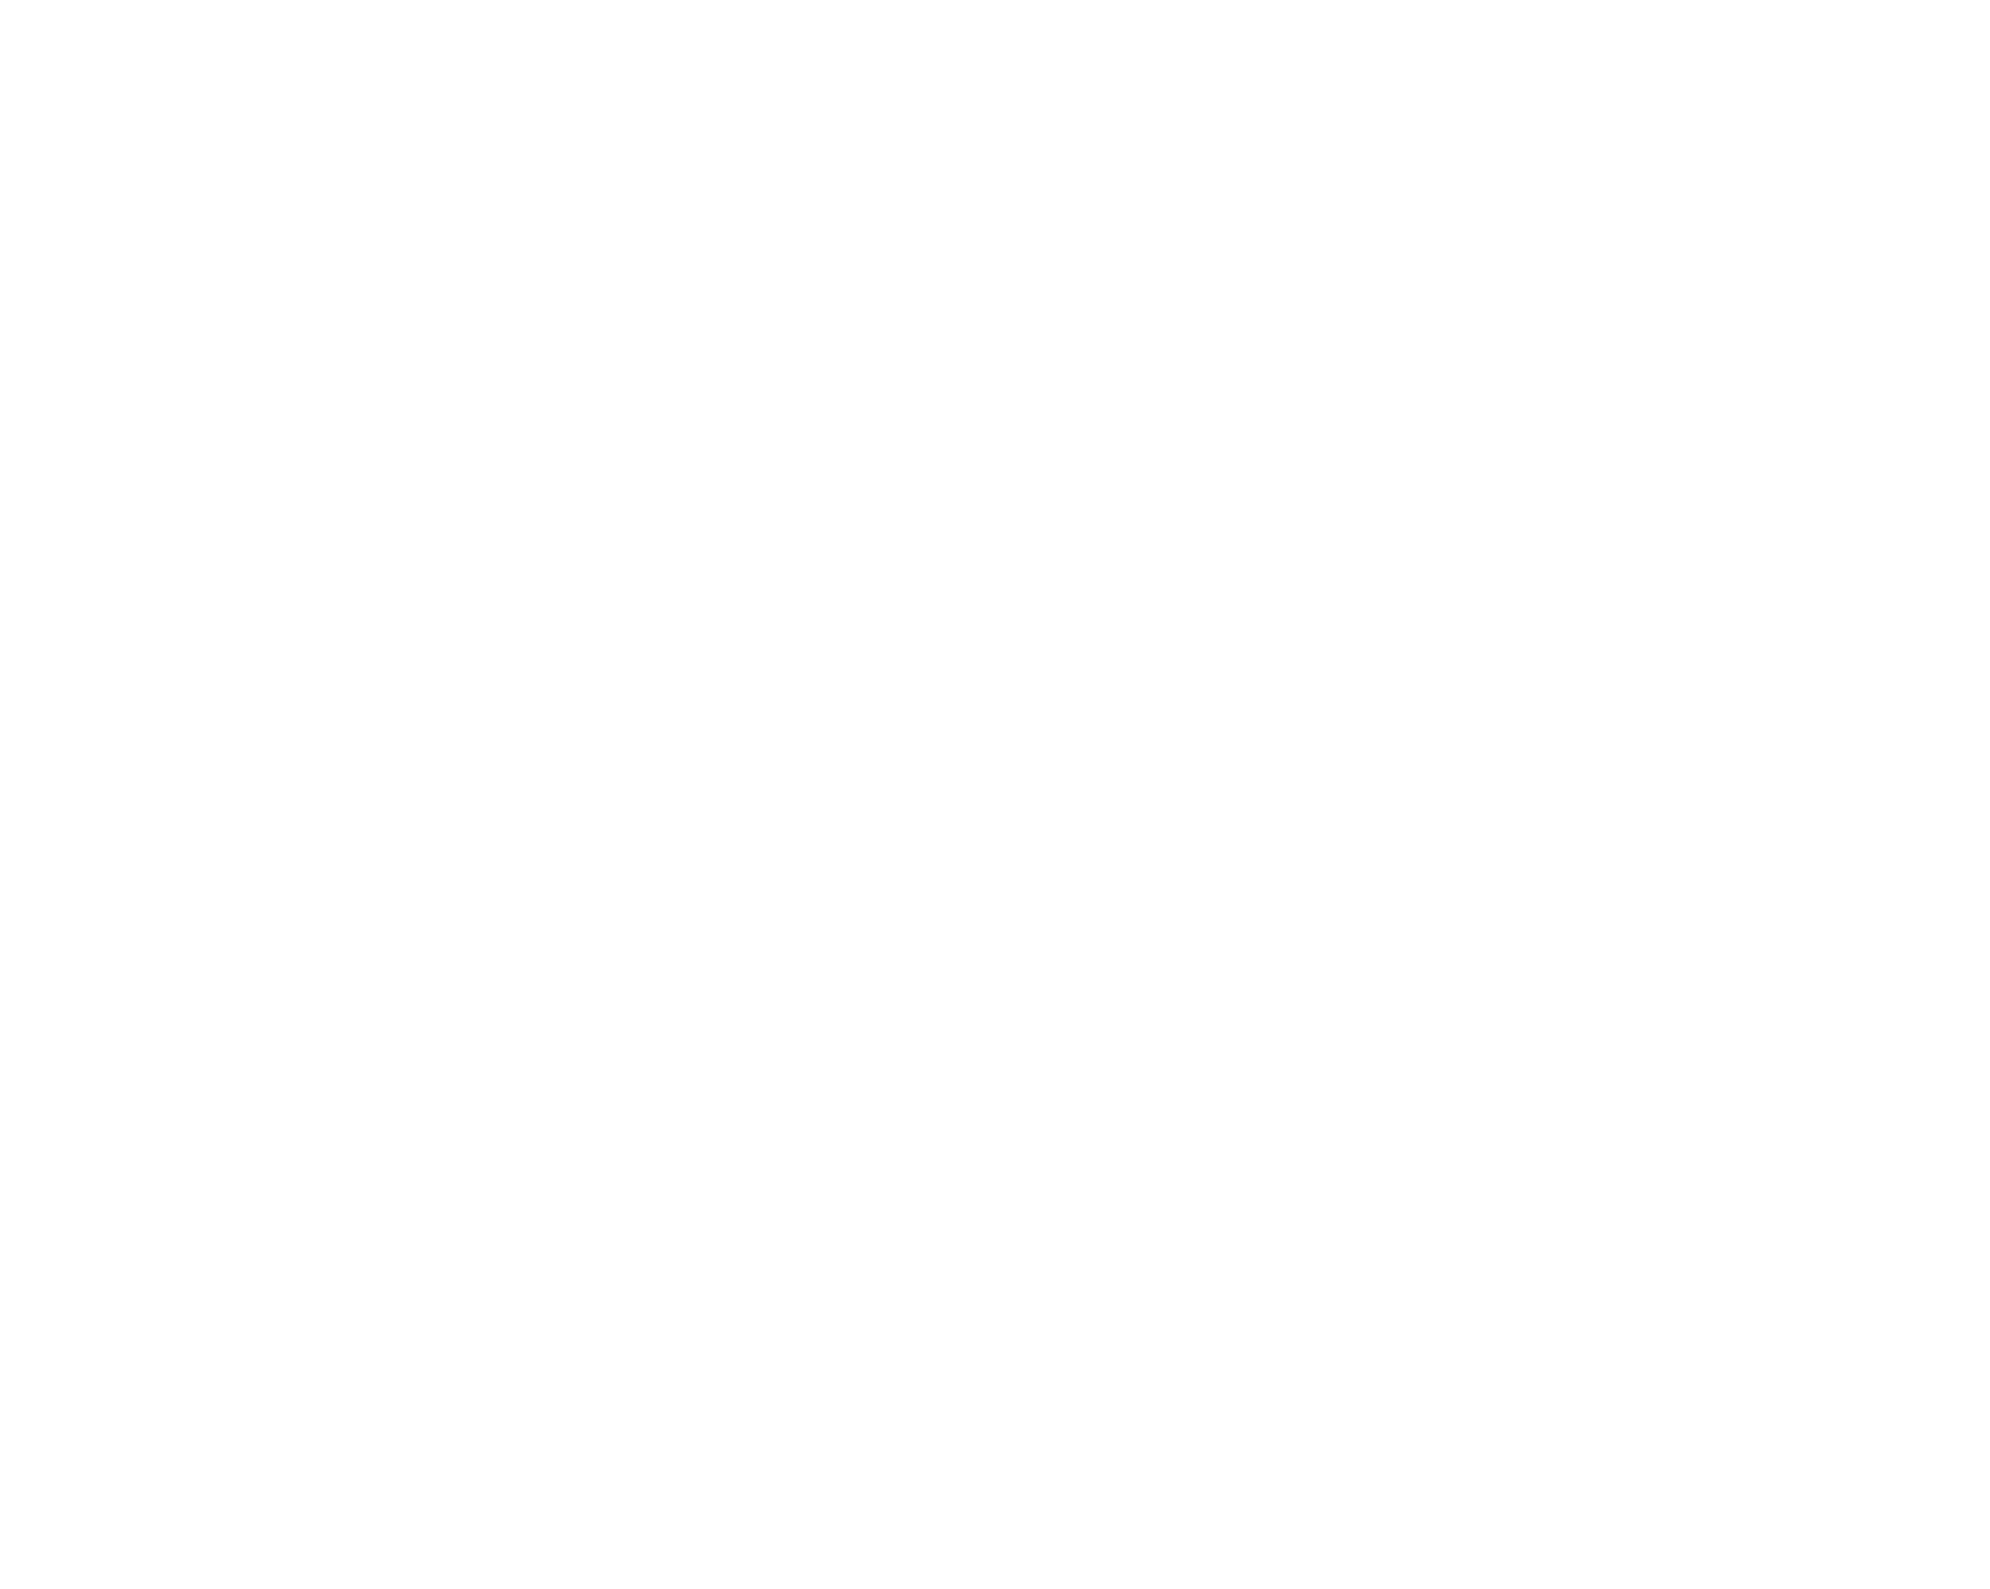

In [50]:
display_species_images_grid(black_walnut_data)

In [51]:
# EOF